In [48]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import glob
import cv2

In [39]:
DATADIR = './fruits/fruits-360/Training/'
X_FILE = 'features.npy'
Y_FILE = 'labels.npy'
IMG_SIZE = 50


# for folder in os.listdir(DATADIR):
#     path = os.path.join(DATADIR, folder)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#         new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
# #         training_data.append([new_array, 1])
#         print(new_array)
#         plt.imshow(new_array, cmap="gray")
#         plt.show()
#         break
#     break


    

In [40]:
training_data = []
BANANA_PATHS = [DATADIR + 'Banana', DATADIR + 'Banana_Lady_Finger',DATADIR + 'Banana_Red']
def create_dataset():
    folders = glob.glob(os.path.join(DATADIR, '*'))
    for path in folders:
        label = 0
        if path in BANANA_PATHS:
            label = 1
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, label])
        
create_dataset()

banana
banana
banana


In [41]:
print(len(training_data))


60486


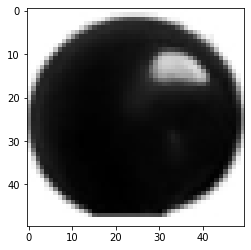

In [42]:
rand_fruit = training_data[np.random.randint(0,high=len(training_data))][0]
plt.imshow(rand_fruit, cmap='gray')
plt.show()

In [43]:
import random
random.shuffle(training_data)

In [44]:
X = []
y = []

In [45]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [46]:
np.save(X_FILE, X)
np.save(Y_FILE, y)

In [49]:
train_dataset = tf.data.Dataset.from_tensor_slices((X, y))

In [50]:
train_dataset

<TensorSliceDataset shapes: ((50, 50, 1), ()), types: (tf.uint8, tf.int32)>